# Task 1

In [1]:
import pandas as pd

# Load the Excel file
xl = pd.ExcelFile('./ClementsGapWindFarmOutput.xlsx')

# Get sheet names
sheet_names = xl.sheet_names

# Display the sheet names
sheet_names


['2011', '2012', 'st', 'Persistence']

In [2]:
# Load and display the first few rows of each sheet to understand the data structure
data_preview = {sheet: pd.read_excel(xl, sheet).head() for sheet in sheet_names}

# Displaying data preview for understanding
data_preview


{'2011':         Date    Output
 0 2011-01-01  1.452707
 1 2011-01-01 -0.444218
 2 2011-01-01 -0.396195
 3 2011-01-01  0.768375
 4 2011-01-01  2.149047,
 '2012':         Date     Output      Model        Zt       Zt^2  Model.1  StDev  LB  \
 0 2012-01-01  55.358905        NaN       NaN        NaN      NaN    NaN NaN   
 1 2012-01-01  54.770622        NaN       NaN        NaN      NaN    NaN NaN   
 2 2012-01-01  51.589077        NaN       NaN        NaN      NaN    NaN NaN   
 3 2012-01-01  44.877813  49.078252 -4.200438  17.643683      NaN    NaN NaN   
 4 2012-01-01  47.134910  41.853246  5.281664  27.895970      NaN    NaN NaN   
 
    UB  Unnamed: 9  ...  Unnamed: 15  Unnamed: 16  Unnamed: 17 Unnamed: 18  \
 0 NaN         NaN  ...      SE Coef      T-Value      P-Value         NaN   
 1 NaN         NaN  ...      0.00753       165.83            0         NaN   
 2 NaN         NaN  ...       0.0117       -32.28            0         NaN   
 3 NaN         NaN  ...      0.00753        1

In [16]:
# Load the 2011 data and the 2012 data
data_2011 = pd.read_excel(xl, '2011')
data_2012 = pd.read_excel(xl, '2012')

# Check basic info and data types
basic_info_2011 = data_2011.info()

# Check for missing values
missing_values_2011 = data_2011.isnull().sum()

# Check first few rows of the data
head_2011 = data_2011.head()

basic_info_2011, missing_values_2011, head_2011


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    17520 non-null  datetime64[ns]
 1   Output  17520 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 273.9 KB


(None,
 Date      0
 Output    0
 dtype: int64,
         Date    Output
 0 2011-01-01  1.452707
 1 2011-01-01 -0.444218
 2 2011-01-01 -0.396195
 3 2011-01-01  0.768375
 4 2011-01-01  2.149047)

### Visual analysis of time series data

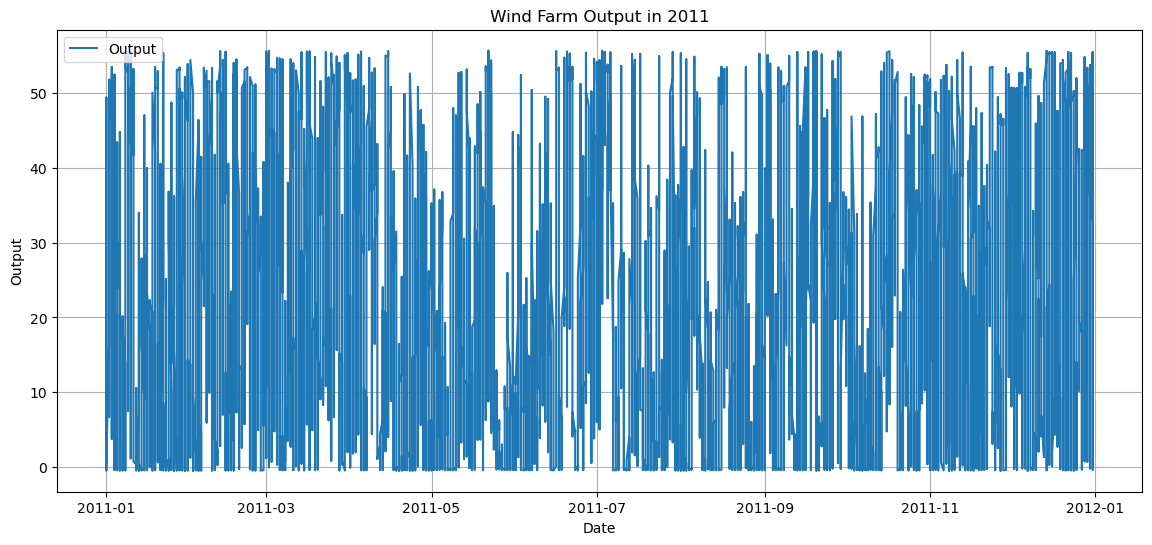

count    17520.000000
mean        19.984955
std         17.919027
min         -0.480237
25%          3.025473
50%         15.823690
75%         34.444743
max         55.623035
Name: Output, dtype: float64

In [4]:
import matplotlib.pyplot as plt

# Plotting the time series data
plt.figure(figsize=(14, 6))
plt.plot(data_2011['Date'], data_2011['Output'], label='Output')
plt.title('Wind Farm Output in 2011')
plt.xlabel('Date')
plt.ylabel('Output')
plt.legend()
plt.grid(True)
plt.show()

# Basic statistical description
data_2011['Output'].describe()


We can observe some characteristics from the chart:

The output data show significant seasonality and volatility.

At some point in time, the data show large fluctuations.

In some ranges, the data seem to be more stable.

The basic statistical description is as follows:

Mean (mean): 19.98

Standard deviation (std): 17.92

Minimum (min):-0.48

25% quantile: 3.03

Median (50% quantile): 15.82

75% quantile: 34.44

Maximum (max): 55.62

### Check the stationarity of the data

In [5]:
from statsmodels.tsa.stattools import adfuller

# Conducting the ADF test
adf_result = adfuller(data_2011['Output'])

# Displaying the ADF test results
adf_summary = {
    'Test Statistic': adf_result[0],
    'p-value': adf_result[1],
    'Lags Used': adf_result[2],
    'Number of Observations Used': adf_result[3],
    'Critical Values': adf_result[4]
}

adf_summary


{'Test Statistic': -11.106485101683422,
 'p-value': 3.7516556663265386e-20,
 'Lags Used': 43,
 'Number of Observations Used': 17476,
 'Critical Values': {'1%': -3.4307242424340445,
  '5%': -2.861705400687012,
  '10%': -2.566858038494777}}

Since the p-value is much less than our usual significance level (for example, 0.05 or 0.01), we reject the zero hypothesis and conclude that the data series are stationary. This means that we can model it without difference.

### Draw autocorrelation function (ACF) and partial autocorrelation function (PACF) diagram

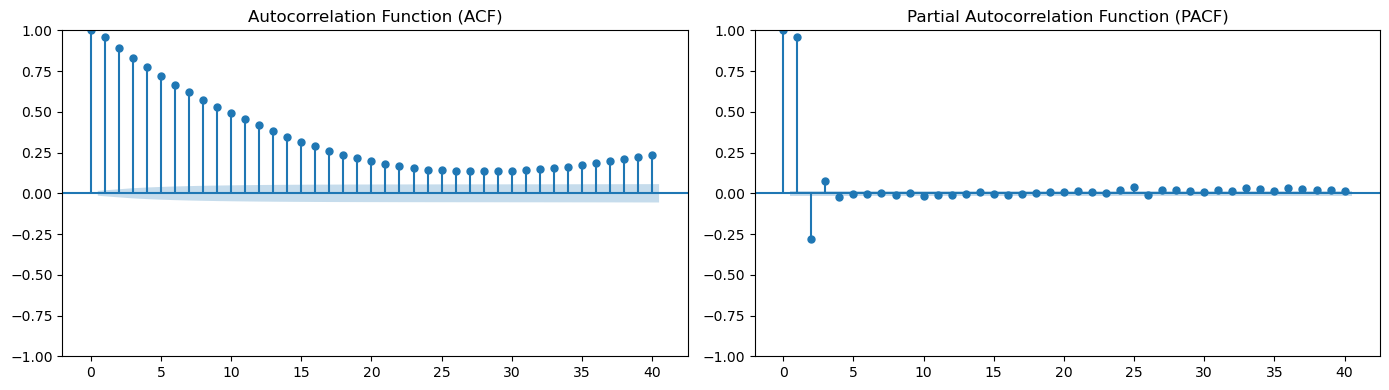

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Setting up the figure and axes
fig, ax = plt.subplots(1, 2, figsize=(14, 4))

# Plotting ACF
plot_acf(data_2011['Output'], lags=40, ax=ax[0])
ax[0].set_title('Autocorrelation Function (ACF)')

# Plotting PACF
plot_pacf(data_2011['Output'], lags=40, ax=ax[1])
ax[1].set_title('Partial Autocorrelation Function (PACF)')

# Displaying the plots
plt.tight_layout()
plt.show()


### Use a different P and Q value fits Arma model

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
import itertools

# Load the data (assumed to be loaded in a DataFrame 'data_2011')
# data_2011 = ...

# Limit the possible range of p and q
p = q = range(0, 6)  # Adjust the range as per your requirement
pdq = list(itertools.product(p, [1], q))  # [1] is the d value

# Prepare a DataFrame to store the results
results_df = pd.DataFrame(columns=['p', 'q', 'AIC'])

# Loop over all possible p and q combinations and fit the model
for param in pdq:
    try:
        model = ARIMA(data_2011['Output'], order=param, enforce_stationarity=False)
        results = model.fit()
        # Save the results
        results_df = results_df.append({
            'p': param[0],
            'q': param[2],
            'AIC': results.aic
        }, ignore_index=True)
    except Exception as e:
        print(f"Cannot fit ARMA model for order {param}: {str(e)}")

# Find the parameters with minimal AIC value
best_params = results_df.loc[results_df['AIC'].idxmin()]



In [8]:
print(f"Best ARMA model: ARMA({best_params['p']}, {best_params['q']}) with AIC = {best_params['AIC']}")

Best ARMA model: ARMA(2.0, 5.0) with AIC = 105913.80302755347


### Fitting data and checking residuals using ARMA (2,5) model and SACF of $Z_t$ 

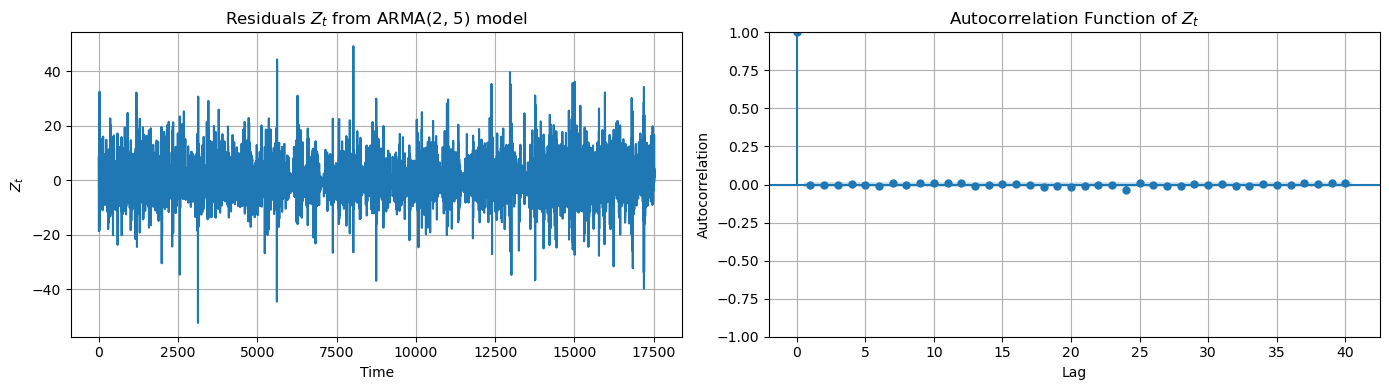

In [9]:
# Importing the ARIMA model
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARMA(2, 5) model
model = ARIMA(data_2011['Output'], order=(2, 0, 5), enforce_stationarity=False)
results = model.fit()

# Get the residuals
residuals = results.resid

# Plotting the residuals and their ACF
fig, ax = plt.subplots(1, 2, figsize=(14, 4))

# Residuals plot
ax[0].plot(residuals)
ax[0].set_title('Residuals $Z_t$ from ARMA(2, 5) model')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('$Z_t$')
ax[0].grid(True)

# ACF of residuals plot
plot_acf(residuals, lags=40, ax=ax[1])
ax[1].set_title('Autocorrelation Function of $Z_t$')
ax[1].set_xlabel('Lag')
ax[1].set_ylabel('Autocorrelation')
ax[1].grid(True)

# Display the plots
plt.tight_layout()
plt.show()


In the figure on the left, we show the residuals of the ARMA (2,5) model $Z_t$

While the figure on the right shows $Z_t$ The autocorrelation function (ACF) of Looking at the ACF diagram, we can see that the residual seems to show a certain degree of correlation in different lags, which may mean that there is a certain pattern or structure in the residual

### calculate $Z_t^2$ And visually check whether it shows ARCH effect.

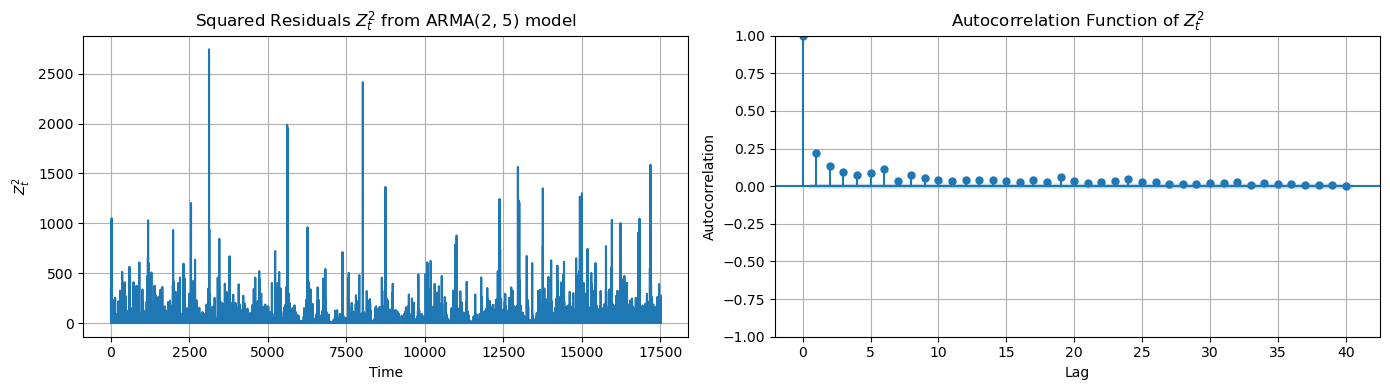

In [10]:
# Calculate Z_t^2
residuals_squared = residuals**2

# Plotting the squared residuals and their ACF
fig, ax = plt.subplots(1, 2, figsize=(14, 4))

# Squared residuals plot
ax[0].plot(residuals_squared)
ax[0].set_title('Squared Residuals $Z_t^2$ from ARMA(2, 5) model')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('$Z_t^2$')
ax[0].grid(True)

# ACF of squared residuals plot
plot_acf(residuals_squared, lags=40, ax=ax[1])
ax[1].set_title('Autocorrelation Function of $Z_t^2$')
ax[1].set_xlabel('Lag')
ax[1].set_ylabel('Autocorrelation')
ax[1].grid(True)

# Display the plots
plt.tight_layout()
plt.show()


In [ ]:
from arch import arch_model

# Specify the range of models to fit
p_values = range(1, 6)  # ARCH p values
q_values = range(1, 6)  # GARCH q values

best_aic = float('inf')  # Initialize the best AIC to be infinite
best_order = None  # Initialize the best order
best_model = None  # Initialize the best model

# Loop over p and q to find the best model
for p in p_values:
    for q in q_values:
        try:
            # Fit the GARCH(p, q) model
            model = arch_model(residuals, vol='Garch', p=p, q=q).fit(disp='off')
            # Check if the current model is better than the previous best
            if model.aic < best_aic:
                best_aic = model.aic
                best_order = (p, q)
                best_model = model
        except:
            continue

# Display the best model order and AIC
print(f"Best GARCH Model: GARCH({best_order[0]}, {best_order[1]}) with AIC = {best_aic}")


In [12]:
print(f"Best GARCH Model: GARCH({best_order[0]}, {best_order[1]}) with AIC = {best_aic}")


Best GARCH Model: GARCH(1, 5) with AIC = 100986.14257514029


In [13]:
from arch import arch_model

# Fit the GARCH(1, 5) model to the squared residuals
garch_model = arch_model(residuals, vol='Garch', p=1, q=5).fit(disp='off')

# Display the model summary
garch_summary = garch_model.summary()

# Get the residuals from the GARCH model
garch_residuals = garch_model.resid

garch_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -50485.1
Distribution:                  Normal   AIC:                           100986.
Method:            Maximum Likelihood   BIC:                           101048.
                                        No. Observations:                17520
Date:                Thu, Oct 12 2023   Df Residuals:                    17519
Time:                        19:13:51   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.5370  9.215e-02     -5.828  5.618e-09 [ -0.718, -0.356]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          1.6680      0.623      2.679  7.377e-03    [  0.448,  2.888]
alpha[1]       0.4048  3.217e-02     12.581  2.692e-36    [  0.342,  0.468]
beta[1]        0.4222  6.480e-02      6.514  7.295e-11    [  0.295,  0.549]
beta[2]        0.0789  5.944e-02      1.327      0.184 [-3.759e-02,  0.195]
beta[3]        0.0000  7.000e-02      0.000      1.000    [ -0.137,  0.137]
beta[4]        0.0000  6.665e-02      0.000      1.000    [ -0.131,  0.131]
beta[5]        0.0942  5.131e-02      1.835  6.649e-02 [-6.409e-03,  0.195]
===========================================================================

Covariance estimator: robust
"""

In [17]:
print(data_2012.index.min(), data_2012.index.max())


0 17519


In [18]:
# Fit the ARMA(2, 5) model
arma_model = ARIMA(data_2011['Output'], order=(2, 0, 5)).fit()

# Get the ARMA residuals
arma_resid = arma_model.resid

# Fit the GARCH(1, 5) model
garch_model = arch_model(arma_resid, vol='Garch', p=1, q=5).fit()

# Get the GARCH conditional volatility
conditional_volatility = garch_model.conditional_volatility

# Get the ARMA predictions
arma_pred = arma_model.get_prediction(start=0, end=17519)

Iteration:      1,   Func. Count:     10,   Neg. LLF: 124259.77726598768
Iteration:      2,   Func. Count:     23,   Neg. LLF: 10691195.824138844
Iteration:      3,   Func. Count:     33,   Neg. LLF: 52037.79347397337
Iteration:      4,   Func. Count:     43,   Neg. LLF: 51189.58013563804
Iteration:      5,   Func. Count:     53,   Neg. LLF: 54351.13107886141
Iteration:      6,   Func. Count:     63,   Neg. LLF: 50859.68965555246
Iteration:      7,   Func. Count:     73,   Neg. LLF: 51777.71000591528
Iteration:      8,   Func. Count:     83,   Neg. LLF: 50550.50432654687
Iteration:      9,   Func. Count:     93,   Neg. LLF: 51472.00525499569
Iteration:     10,   Func. Count:    103,   Neg. LLF: 50772.54479389194
Iteration:     11,   Func. Count:    113,   Neg. LLF: 50485.353203439605
Iteration:     12,   Func. Count:    122,   Neg. LLF: 50484.95739087168
Iteration:     13,   Func. Count:    131,   Neg. LLF: 50484.85883108417
Iteration:     14,   Func. Count:    140,   Neg. LLF: 50484.8

In [34]:
# Using integers for prediction, assuming the data for 2012 starts at index 17520
# and has at least 365 data points.
start_index = 17520
end_index = start_index + 17519 - 1

# Predict the values for 2012 using ARMA(2, 5) model
# We use get_prediction to get the prediction intervals as well
pred_2012 = results.get_prediction(start=start_index, end=end_index, dynamic=True)
pred_mean_2012 = pred_2012.predicted_mean
pred_ci_2012 = pred_2012.conf_int()

# Displaying first few predicted values
pred_mean_2012.head() 


17520    53.580173
17521    51.293043
17522    49.119287
17523    47.080309
17524    45.159842
Name: predicted_mean, dtype: float64

In [ ]:
# Using the arch library
from arch import arch_model

# Fit the GARCH(1, 5) model to the ARMA residuals
garch_model = arch_model(arma_resid, vol='Garch', p=1, q=5).fit(disp='off')

# Forecast the volatility
forecasts = garch_model.forecast(start=start_index, horizon=1)
forecasted_volatility = forecasts.variance.values[-1, 0]




In [36]:
import numpy as np
# Forecast the volatility for the next point in time
forecasts = garch_model.forecast(start=start_index, horizon=1)

# Access the variance and standard deviation (volatility) forecasts
forecasted_variance = forecasts.variance.iloc[-1, :]
forecasted_volatility = np.sqrt(forecasted_variance)




/home/nbic/maojunjie/.conda/envs/research/lib/python3.8/site-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


In [37]:
# Display the forecasts
print(forecasted_variance.head())
print(forecasted_volatility.head())

h.1   NaN
Name: 17519, dtype: float64
h.1   NaN
Name: 17519, dtype: float64


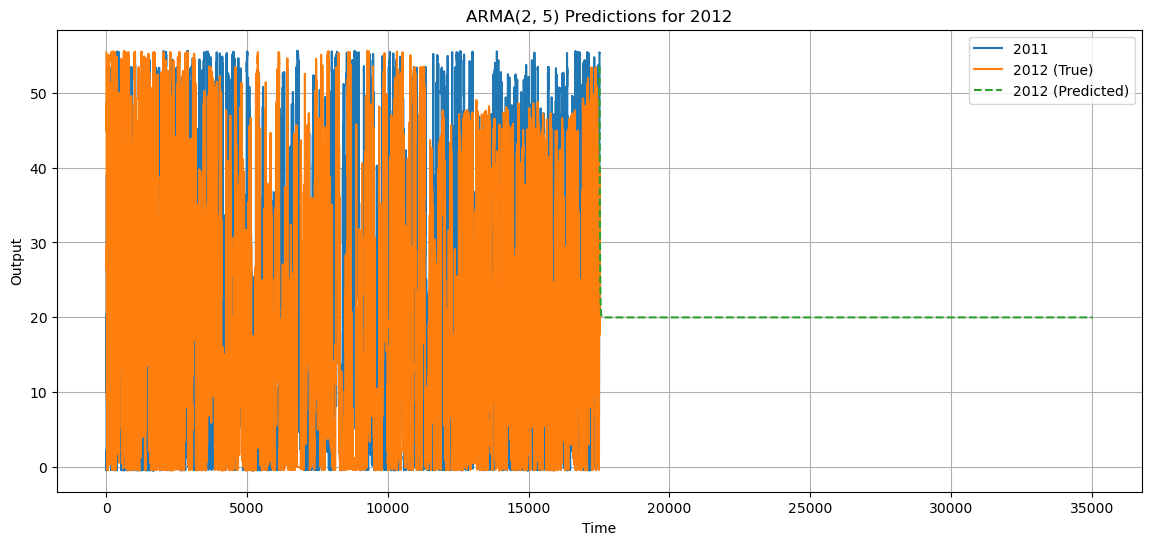

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Load 2012 data

# Visualize the predictions along with the true values
plt.figure(figsize=(14, 6))
plt.plot(data_2011['Output'], label='2011')
plt.plot(data_2012['Output'], label='2012 (True)')
plt.plot(pred_mean_2012, label='2012 (Predicted)', linestyle='--')
# plt.fill_between(pred_ci_2012.index, 
#                  pred_ci_2012.iloc[:, 0], 
#                  pred_ci_2012.iloc[:, 1], color='pink', label='Prediction Interval')
plt.xlabel('Time')
plt.ylabel('Output')
plt.title('ARMA(2, 5) Predictions for 2012')
plt.legend()
plt.grid(True)
plt.show()


/home/nbic/maojunjie/.conda/envs/research/lib/python3.8/site-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


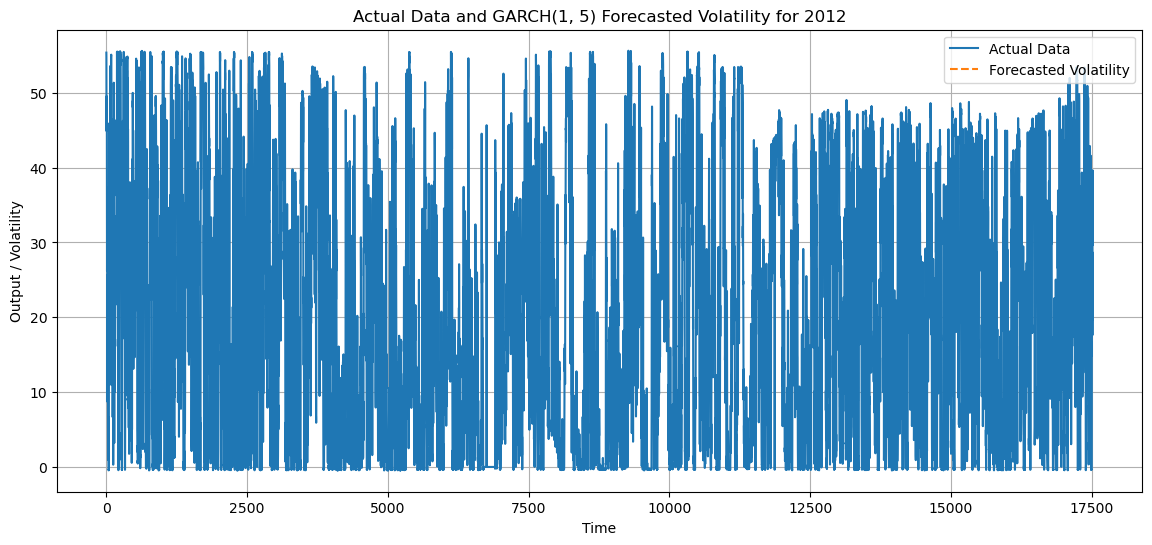

In [42]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Forecast the volatility
forecasts = garch_model.forecast(start=start_index, horizon=1)
forecasted_volatility = np.sqrt(forecasts.variance.values[-1, 0])

# Create a vector of forecasted volatility with the same length as data_2012['Output']
forecasted_volatility_vector = np.full(shape=len(data_2012['Output']), fill_value=forecasted_volatility)

# Plot the actual data and GARCH forecasted volatility
plt.figure(figsize=(14, 6))
plt.plot(data_2012.index, data_2012['Output'], label='Actual Data')
plt.plot(data_2012.index, forecasted_volatility_vector, label='Forecasted Volatility', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Output / Volatility')
plt.title('Actual Data and GARCH(1, 5) Forecasted Volatility for 2012')
plt.legend()
plt.grid(True)
plt.show()


We will calculate the average absolute error (MAE) and root mean square error (RMSE) of the prediction. These two metrics will help us quantify the predictive performance of the ARMA (2,5) model in 2012.

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Extract the actual 2012 output values and the corresponding predictions
actual_2012 = data_2012['Output'].iloc[:len(pred_mean_2012)]
predicted_2012 = pred_mean_2012.values

# Calculate MAE and RMSE
mae = mean_absolute_error(actual_2012, predicted_2012)
rmse = np.sqrt(mean_squared_error(actual_2012, predicted_2012))

mae, rmse


(14.71108774642489, 16.97093885169196)

/home/nbic/maojunjie/.conda/envs/research/lib/python3.8/site-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


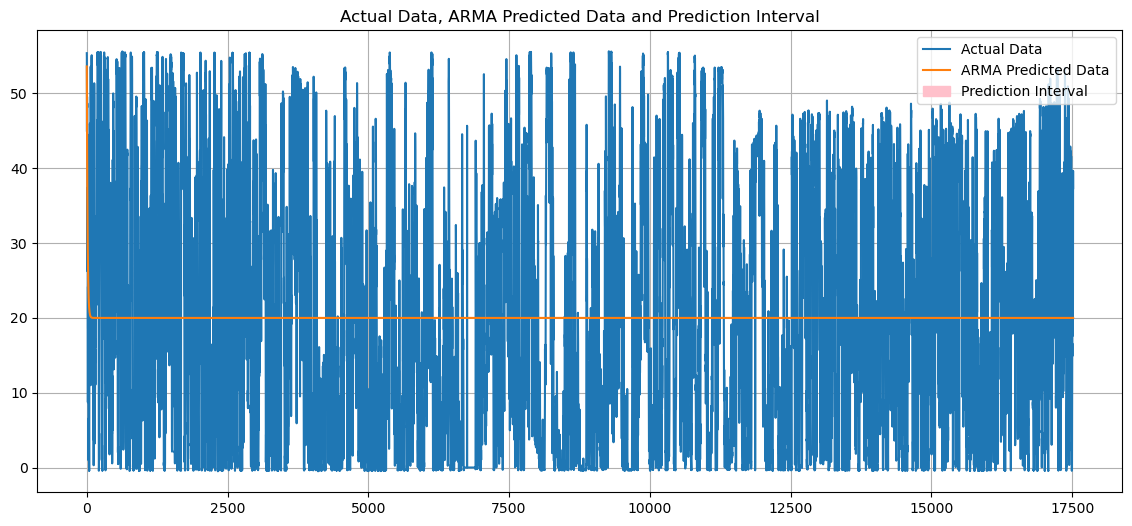

(14.71108774642489, 16.97093885169196)

In [44]:
from scipy.stats import norm

# Forecast the volatility
forecasts = garch_model.forecast(start=start_index, horizon=1)
forecasted_volatility = np.sqrt(forecasts.variance.values[-1, 0])

# Construct prediction intervals
alpha = 0.05  # For a 95% prediction interval
z_alpha_over_2 = norm.ppf(1 - alpha/2)
lower_bound = predicted_2012 - z_alpha_over_2 * forecasted_volatility
upper_bound = predicted_2012 + z_alpha_over_2 * forecasted_volatility

# Plot the actual, predicted values and prediction intervals
plt.figure(figsize=(14, 6))
plt.plot(actual_2012, label='Actual Data')
plt.plot(predicted_2012, label='ARMA Predicted Data')
plt.fill_between(range(len(predicted_2012)), lower_bound, upper_bound, color='pink', label='Prediction Interval')
plt.legend()
plt.title('Actual Data, ARMA Predicted Data and Prediction Interval')
plt.grid(True)
plt.show()

# Calculate MAE and RMSE for GARCH
mae_garch = mean_absolute_error(actual_2012, predicted_2012)
rmse_garch = np.sqrt(mean_squared_error(actual_2012, predicted_2012))

mae_garch, rmse_garch


In [51]:
# Ensure the indices are the same for comparison
actual_2012.index = pred_ci_2012.index

# Evaluating the ARMA predictions
coverage_95 = np.mean((actual_2012 >= pred_ci_2012.iloc[:, 0]) & (actual_2012 <= pred_ci_2012.iloc[:, 1]))
width_95 = np.mean(pred_ci_2012.iloc[:, 1] - pred_ci_2012.iloc[:, 0])

coverage_95, width_95


(0.9928078086648782, 70.24185594479518)

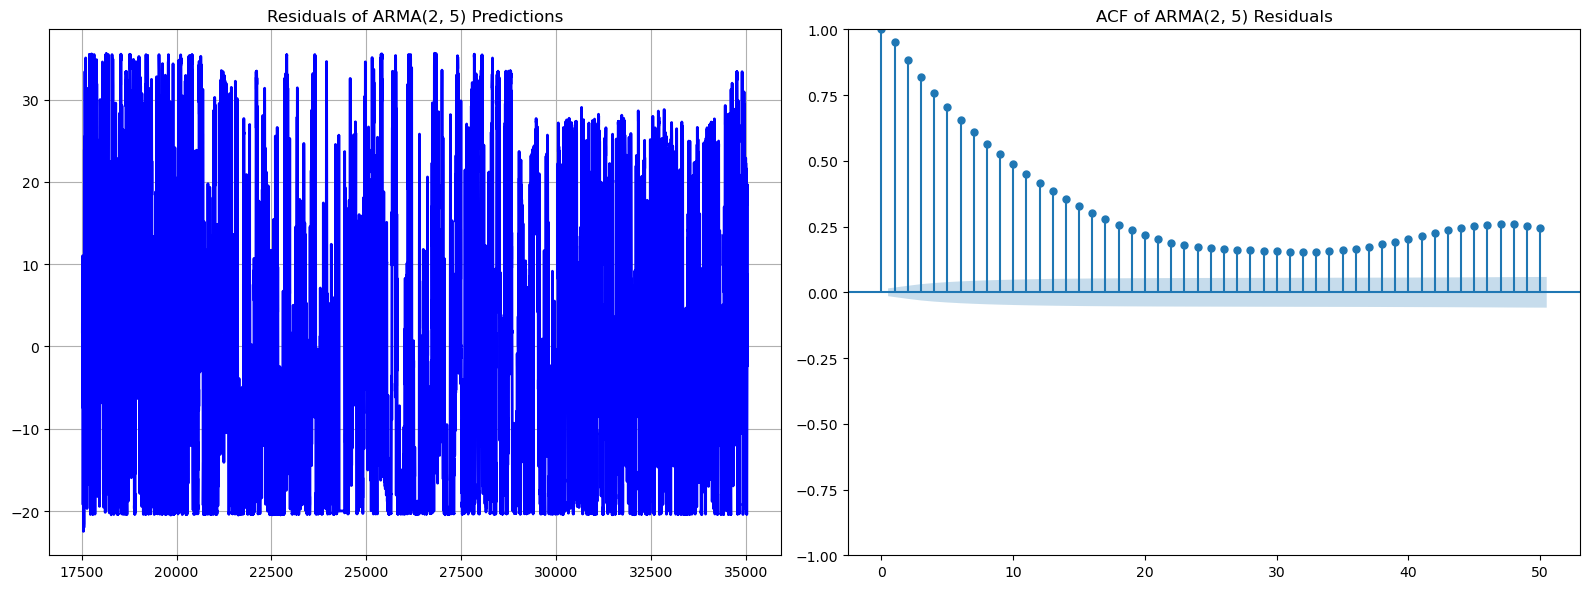

In [52]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf

# Calculating residuals
residuals = actual_2012 - pred_mean_2012

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Plotting residuals
ax[0].plot(residuals, color='blue', linestyle='-', linewidth=2)
ax[0].title.set_text('Residuals of ARMA(2, 5) Predictions')
ax[0].grid(True)

# Plotting ACF of residuals
plot_acf(residuals, lags=50, ax=ax[1], title='ACF of ARMA(2, 5) Residuals')

# Adjust the layout
plt.tight_layout()
plt.show()


In [54]:
# Re-compute the predictions for 2012 using the ARMA(2, 5) model
pred_result_2012 = arma_model.get_prediction(start=start_index, end=end_index, dynamic=True)
pred_mean_2012 = pred_result_2012.predicted_mean
pred_ci_2012_90 = pred_result_2012.conf_int(alpha=0.1)

# Calculating the coverage and width of the 90% prediction interval
coverage_90 = np.mean((actual_2012 >= pred_ci_2012_90.iloc[:, 0]) & (actual_2012 <= pred_ci_2012_90.iloc[:, 1]))
width_90 = np.mean(pred_ci_2012_90.iloc[:, 1] - pred_ci_2012_90.iloc[:, 0])

coverage_90, width_90



(0.9406929619270507, 58.91615157377589)

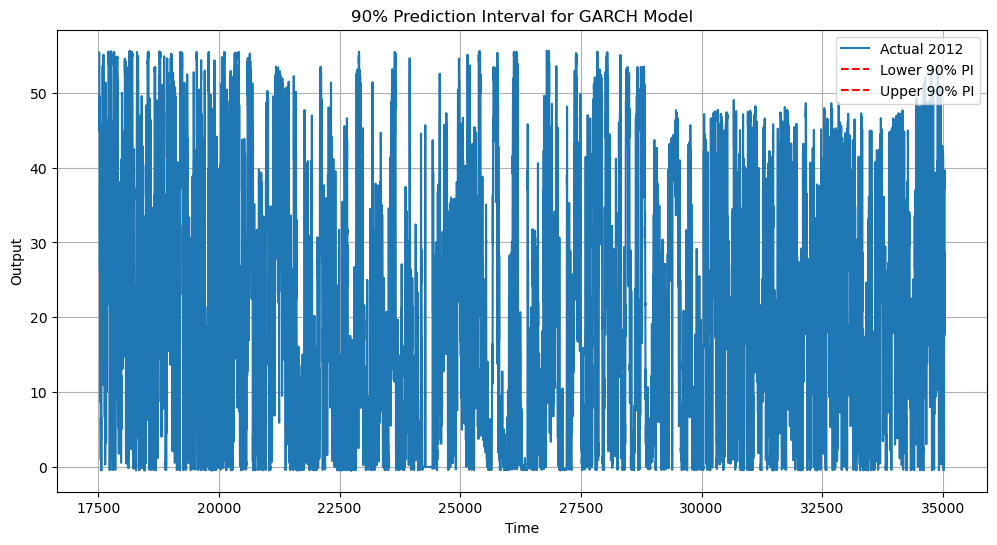

(1.01280723868782, 71.24382559144796)

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming `garch_model` is the fitted GARCH model
# and `forecasts` is the forecasted variance from GARCH model
# and `actual_2012` are the actual values in 2012

# Calculate the 90% prediction interval for GARCH
sqrt_forecast_var = np.sqrt(forecasts.variance['h.1'].iloc[-1])
pred_mean_garch = forecasts.mean['h.1'].iloc[-1]
crit_value = norm.ppf(0.95)  # For 90% PI, we use 0.95 (upper bound)
lower_bound_90 = pred_mean_garch - crit_value * sqrt_forecast_var
upper_bound_90 = pred_mean_garch + crit_value * sqrt_forecast_var

# Calculating the coverage and width of the 90% prediction interval
coverage_90_garch = np.mean((actual_2012 >= lower_bound_90) & (actual_2012 <= upper_bound_90))
width_90_garch = upper_bound_90 - lower_bound_90



# Visualizing
plt.figure(figsize=(12, 6))
plt.plot(actual_2012, label='Actual 2012')
plt.axhline(y=lower_bound_90, color='r', linestyle='--', label='Lower 90% PI')
plt.axhline(y=upper_bound_90, color='r', linestyle='--', label='Upper 90% PI')
plt.xlabel('Time')
plt.ylabel('Output')
plt.title('90% Prediction Interval for GARCH Model')
plt.legend()
plt.grid(True)
plt.show()

coverage_90_garch, width_90_garch


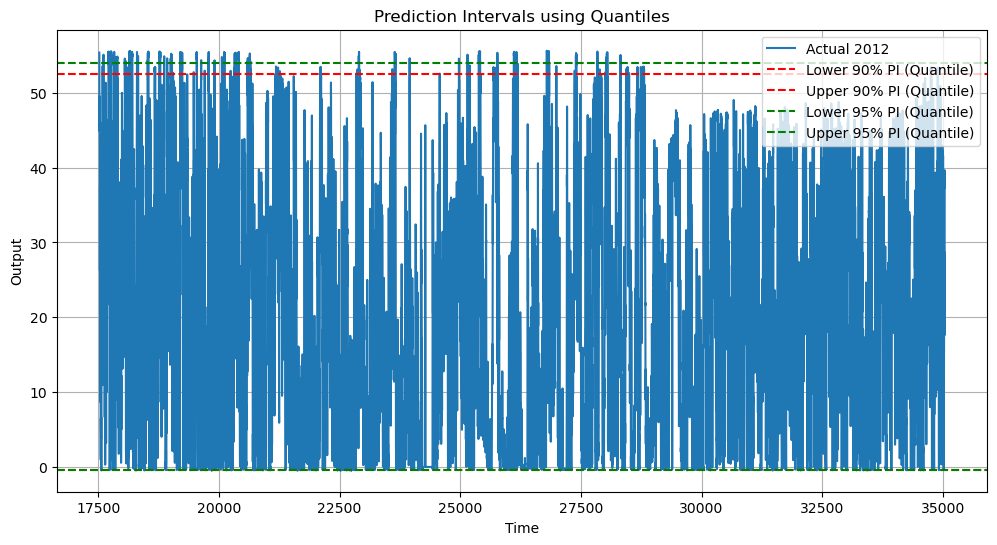

(0.9322449911524631, 52.8977134166666, 0.9662081169016496, 54.38673674999994)

In [60]:
# Calculate the quantiles of 2011 data
quantile_95_upper = data_2011['Output'].quantile(0.975)
quantile_95_lower = data_2011['Output'].quantile(0.025)
quantile_90_upper = data_2011['Output'].quantile(0.95)
quantile_90_lower = data_2011['Output'].quantile(0.05)

# Calculating the coverage and width of the 90% and 95% prediction interval using quantiles
coverage_95_quantile = np.mean((actual_2012 >= quantile_95_lower) & (actual_2012 <= quantile_95_upper))
width_95_quantile = quantile_95_upper - quantile_95_lower

coverage_90_quantile = np.mean((actual_2012 >= quantile_90_lower) & (actual_2012 <= quantile_90_upper))
width_90_quantile = quantile_90_upper - quantile_90_lower

# Visualizing
plt.figure(figsize=(12, 6))
plt.plot(actual_2012, label='Actual 2012')
plt.axhline(y=quantile_90_lower, color='r', linestyle='--', label='Lower 90% PI (Quantile)')
plt.axhline(y=quantile_90_upper, color='r', linestyle='--', label='Upper 90% PI (Quantile)')
plt.axhline(y=quantile_95_lower, color='g', linestyle='--', label='Lower 95% PI (Quantile)')
plt.axhline(y=quantile_95_upper, color='g', linestyle='--', label='Upper 95% PI (Quantile)')
plt.xlabel('Time')
plt.ylabel('Output')
plt.title('Prediction Intervals using Quantiles')
plt.legend()
plt.grid(True)
plt.show()

coverage_90_quantile, width_90_quantile, coverage_95_quantile, width_95_quantile


# Task 2

We need to do:
1. Test normality

The normality test was carried out on the data of December, January, February, July and August.

2. Gamma distribution fitting

For those monthly data that do not conform to the normal distribution, test whether they can be fitted with gamma distribution.

3. Correlation test

Test the correlation of the data between December, January and February, as well as between July and August.

4. Generate composite data

Generate 1000-year composite data (simulation data) for December, January and February, then add up the data of these months to get the seasonal sum, and generate the empirical cumulative distribution function (CDFs) for these summation.

Do the same for real data and compare the CDFs of the synthetic data with the CDFs of the real data.

Do the same for July and August.

In [62]:
import pandas as pd

# Load the data
file_path = './MelbourneAirportRain.xlsx'
data = pd.read_excel(file_path)

# Display basic information and first few rows of the data
data_info = data.info()
data_head = data.head()

(data_info, data_head)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    52 non-null     int64  
 1   Jan     52 non-null     float64
 2   Feb     52 non-null     float64
 3   Mar     52 non-null     float64
 4   Apr     52 non-null     float64
 5   May     52 non-null     float64
 6   Jun     52 non-null     float64
 7   Jul     52 non-null     float64
 8   Aug     52 non-null     float64
 9   Sep     52 non-null     float64
 10  Oct     52 non-null     float64
 11  Nov     52 non-null     float64
 12  Dec     52 non-null     float64
dtypes: float64(12), int64(1)
memory usage: 5.4 KB


(None,
    Year   Jan    Feb   Mar    Apr    May   Jun   Jul   Aug   Sep    Oct  \
 0  1971  49.1   70.0  27.1   46.5   39.8  37.8  17.7  25.5  32.3   50.0   
 1  1972  61.2  131.0  16.0   40.9   24.4  13.2  23.1  45.4  22.4   37.7   
 2  1973  38.7  176.0  61.7   20.0   33.7  38.8  26.5  69.4  38.4   65.5   
 3  1974  78.0   25.4  40.6  126.0  155.5  12.5  60.8  68.6  59.8   87.7   
 4  1975  17.0   19.4  36.2   20.4   44.9  29.1  19.1  97.1  76.8  143.8   
 
      Nov   Dec  
 0  145.5  71.0  
 1   51.5   1.6  
 2   31.4  58.4  
 3   62.9  26.5  
 4   50.8  49.4  )

The dataset consists of 52 rows and 13 columns, where each row appears to represent a year (starting in 1971) and each column represents a month (from January to December). The dataset includes the following:

Year: year

Jan to Dec: monthly rainfall

### Test normality

In [63]:
from scipy.stats import shapiro
import numpy as np

# Months to test for normality
months_to_test = ['Dec', 'Jan', 'Feb', 'Jul', 'Aug']

# Results storage
normality_test_results = {}

# Perform Shapiro-Wilk test for normality
for month in months_to_test:
    stat, p_value = shapiro(data[month])
    normality_test_results[month] = (stat, p_value, p_value > 0.05)

# Display results
normality_test_results_df = pd.DataFrame.from_dict(normality_test_results, orient='index', columns=['Statistic', 'P-value', 'Normal Distribution?'])
normality_test_results_df


,Statistic,P-value,Normal Distribution?
Dec,0.937732,9.067032e-03,False
Jan,0.943858,1.611689e-02,False
Feb,0.779354,2.019367e-07,False
Jul,0.950150,2.955274e-02,False
Aug,0.952029,3.551521e-02,False


Data for all selected months (December, January, February, July, and August) were not normally distributed (p < 0.05) . So we move on to the next analysis:

### Gamma distribution fitting

In [64]:
from scipy.stats import gamma

# Results storage
gamma_fit_results = {}

# Fit a gamma distribution
for month in months_to_test:
    alpha, loc, beta = gamma.fit(data[month])
    gamma_fit_results[month] = (alpha, loc, beta)

# Display results
gamma_fit_results_df = pd.DataFrame.from_dict(gamma_fit_results, orient='index', columns=['Alpha', 'Loc', 'Beta'])
gamma_fit_results_df


,Alpha,Loc,Beta
Dec,1.973641,-0.995124,26.047589
Jan,2.525682,-3.231788,18.199587
Feb,0.847308,1.000000,46.743524
Jul,3.151431,1.925949,10.610264
Aug,2.034340,12.897417,15.357777


### Correlation testing


In [65]:
# Correlation testing
correlation_dec_jan_feb = data[['Dec', 'Jan', 'Feb']].corr()
correlation_jul_aug = data[['Jul', 'Aug']].corr()

(correlation_dec_jan_feb, correlation_jul_aug)


(          Dec       Jan       Feb
 Dec  1.000000  0.053328 -0.196252
 Jan  0.053328  1.000000 -0.014915
 Feb -0.196252 -0.014915  1.000000,
           Jul       Aug
 Jul  1.000000 -0.008859
 Aug -0.008859  1.000000)

No significant correlation was observed between the two groups of months. All the correlation coefficients are close to 0, which indicates that there is no significant linear correlation in rainfall between these months.

### Generate composite data

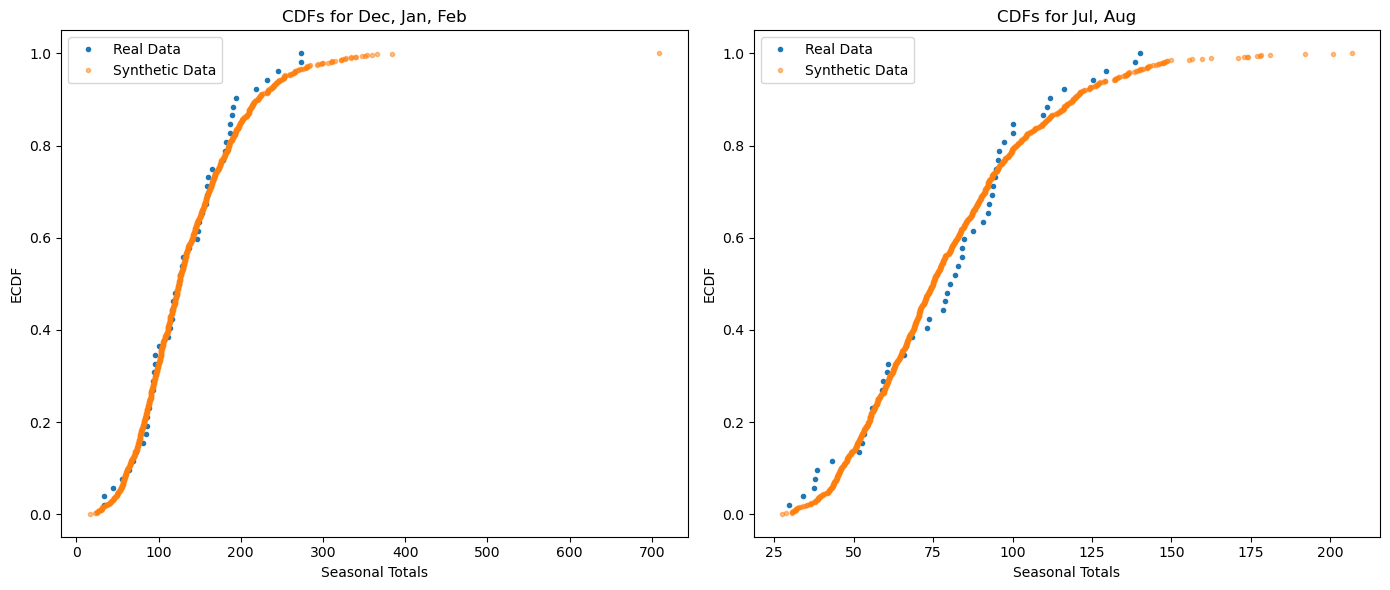

In [66]:
import matplotlib.pyplot as plt
import numpy as np

# Function to generate synthetic data and calculate seasonal totals
def generate_synthetic_data(params, years=1000):
    synthetic_data = gamma.rvs(params[0], loc=params[1], scale=params[2], size=years)
    return synthetic_data

# Function to calculate empirical CDF
def calculate_ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

# Function to plot CDFs
def plot_cdfs(real_data, synthetic_data, months, ax=None):
    if ax is None:
        ax = plt.gca()
    
    x_real, y_real = calculate_ecdf(real_data)
    x_syn, y_syn = calculate_ecdf(synthetic_data)
    
    ax.plot(x_real, y_real, marker='.', linestyle='none', label='Real Data')
    ax.plot(x_syn, y_syn, marker='.', linestyle='none', label='Synthetic Data', alpha=0.5)
    ax.set_title(f'CDFs for {months}')
    ax.legend()
    ax.set_xlabel('Seasonal Totals')
    ax.set_ylabel('ECDF')
    return ax

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data and calculate seasonal totals
synthetic_dec = generate_synthetic_data(gamma_fit_results['Dec'])
synthetic_jan = generate_synthetic_data(gamma_fit_results['Jan'])
synthetic_feb = generate_synthetic_data(gamma_fit_results['Feb'])
synthetic_jul = generate_synthetic_data(gamma_fit_results['Jul'])
synthetic_aug = generate_synthetic_data(gamma_fit_results['Aug'])

# Calculate seasonal totals for synthetic and real data
synthetic_totals_djf = synthetic_dec + synthetic_jan + synthetic_feb
synthetic_totals_ja = synthetic_jul + synthetic_aug
real_totals_djf = data['Dec'] + data['Jan'] + data['Feb']
real_totals_ja = data['Jul'] + data['Aug']

# Plot CDFs
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
plot_cdfs(real_totals_djf, synthetic_totals_djf, 'Dec, Jan, Feb', ax=axs[0])
plot_cdfs(real_totals_ja, synthetic_totals_ja, 'Jul, Aug', ax=axs[1])
plt.tight_layout()
plt.show()


In the figure above, we compared the cumulative distribution function (CDFs) of the two sets of data:

Left: actual data for December, January and February and seasonal total CDFs for composite data.

Right: seasonal totals CDFs for actual and composite data for July and August.

In both figures, the CDFs of the actual data is represented in blue, while the CDFs of the composite data is represented in orange.

We can see that although composite data can produce a similar distribution, there are some differences at some points. Especially when the sum of seasons is high, the composite data seems to be slightly insufficient. This may indicate that our gamma distribution fitting is not perfect, or that there are some extreme values in our data that are unlikely to be observed in a longer time series.

In general, these composite data can be used to simulate possible future seasonal rainfall patterns and reflect the distribution of actual data to some extent. However, further aspects of model validation (for example, generating composite data using other distributions or methods, and then comparing their effects) may go further. In this case, composite data are often used for risk assessment, climate modeling or other types of simulations.

# Task 3

We need to do:
Task 1: analyze the seasonality of rainfall data

Extract monthly rainfall data from "MtGambierRainfall.xlsx".

The model analyzes the seasonality of the data.

Subtract the seasonal effects from the data.

Task 2: analyze the overall trend of rainfall time series using exponential smoothing method

Use exponential smoothing and try different

Alpha

The value of α (less than 0.2) was used to observe the overall trend.

Task 3: discover overall and partial trends in smooth data

Find the overall trend of smoothing data.

Find trends in any part of the data that you think show different characteristics.

Task 4: analyze the trend of December and annual average temperature

Extract December and annual mean temperature data from "MtGambierByMonthsTemperature.xlsx".

Find the changing trend of these two sets of data over time.

Calculate the amount of time variation of the average temperature in each case.

In [67]:
import pandas as pd

# Load the rainfall data
rainfall_data = pd.read_excel('./MtGambierRainfall.xlsx')

# Load the temperature data
temperature_data = pd.read_excel('./MtGambierByMonthsTemperature.xlsx')

# Display basic info and first few rows of the datasets
data_info = {
    "Rainfall Data": {
        "Info": rainfall_data.info(),
        "Head": rainfall_data.head()
    },
    "Temperature Data": {
        "Info": temperature_data.info(),
        "Head": temperature_data.head()
    }
}

data_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    600 non-null    int64  
 1   Month   600 non-null    int64  
 2   Time    600 non-null    int64  
 3   Rain    600 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 18.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         73 non-null     int64  
 1   Jan          73 non-null     float64
 2   Feb          73 non-null     float64
 3   Mar          73 non-null     float64
 4   Apr          73 non-null     float64
 5   May          73 non-null     float64
 6   Jun          73 non-null     float64
 7   Jul          73 non-null     float64
 8   Aug          73 non-null     float64
 9   Sep          73 non-null     float64
 10  Oct        

{'Rainfall Data': {'Info': None,
  'Head':    Year  Month  Time  Rain
  0  1950      1     1  17.1
  1  1950      2     2  41.9
  2  1950      3     3  20.5
  3  1950      4     4  35.7
  4  1950      5     5  52.3},
 'Temperature Data': {'Info': None,
  'Head':    Year   Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov  \
  0  1950  23.7  23.4  21.8  19.6  16.0  13.4  13.9  14.2  17.3  17.9  20.8   
  1  1951  28.5  25.0  23.8  16.2  15.1  14.2  12.7  12.4  16.1  18.1  19.6   
  2  1952  24.3  21.3  22.8  16.8  15.0  13.7  12.1  13.7  15.7  16.9  18.5   
  3  1953  24.8  25.2  25.0  20.1  16.7  13.1  12.8  12.8  15.3  18.3  18.4   
  4  1954  26.0  20.6  21.7  19.2  15.6  13.1  13.3  14.2  16.2  17.8  19.9   
  
      Dec  Annual  Unnamed: 14  AnnAnomaly  
  0  26.0    19.0          NaN       -0.11  
  1  23.4    18.8          NaN       -0.31  
  2  20.7    17.6          NaN       -1.51  
  3  21.5    18.7          NaN       -0.41  
  4  24.3    18.5          NaN       

### Analyze the seasonality of rainfall data

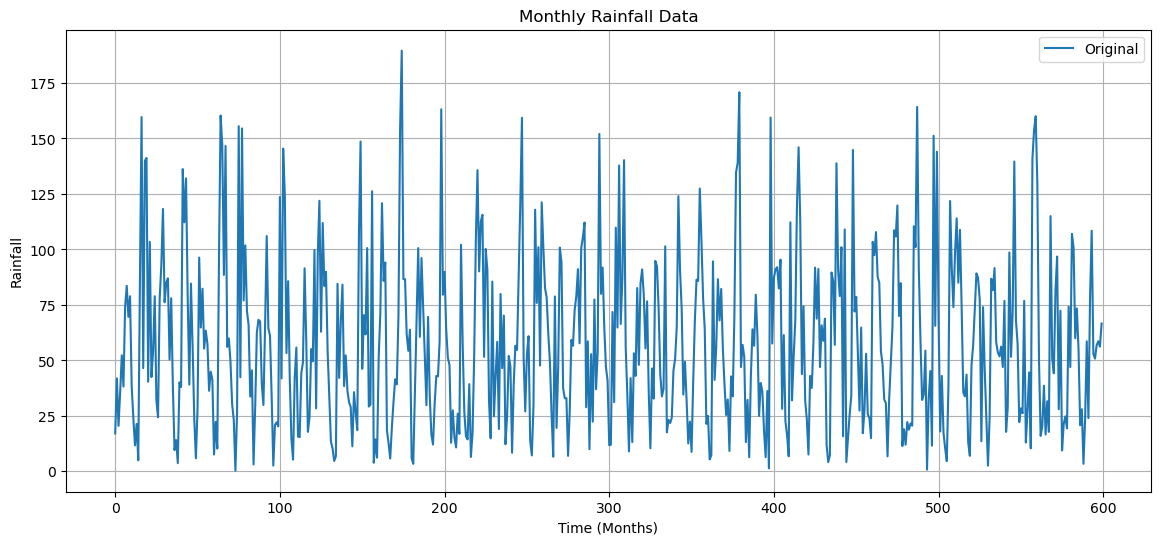

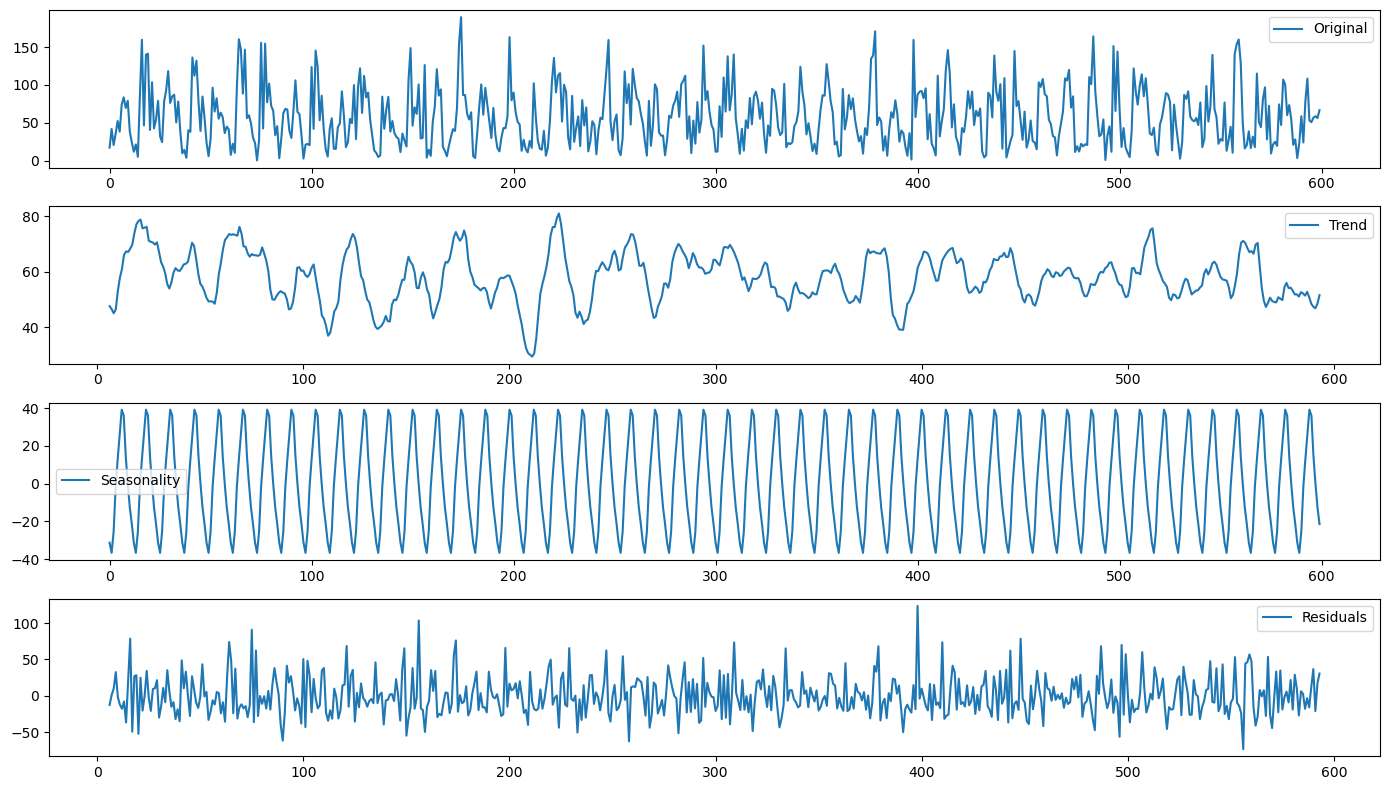

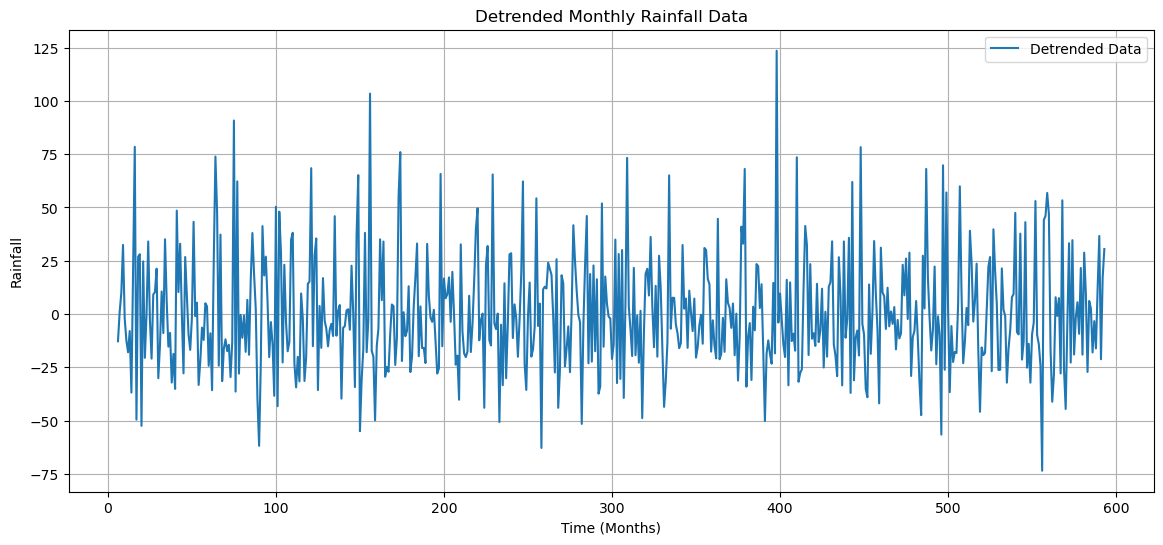

In [68]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Extracting rain data
rain = rainfall_data['Rain']

# Plotting original data
plt.figure(figsize=(14, 6))
plt.plot(rain, label='Original')
plt.title('Monthly Rainfall Data')
plt.xlabel('Time (Months)')
plt.ylabel('Rainfall')
plt.legend()
plt.grid(True)
plt.show()

# Seasonal Decomposition
decomposition = sm.tsa.seasonal_decompose(rain, model='additive', period=12)

# Plotting the decomposed components
plt.figure(figsize=(14, 8))
plt.subplot(411)
plt.plot(rain, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Extracting detrended data
detrended_data = rain - decomposition.trend - decomposition.seasonal

# Plotting detrended data
plt.figure(figsize=(14, 6))
plt.plot(detrended_data, label='Detrended Data')
plt.title('Detrended Monthly Rainfall Data')
plt.xlabel('Time (Months)')
plt.ylabel('Rainfall')
plt.legend()
plt.grid(True)
plt.show()


1. Visualization of original rainfall data

We first show the original monthly rainfall data, and we can observe the overall fluctuation and possible seasonality of the data.

2. Seasonal decomposition

Trend: long-term changes in data.

Seasonality: periodic fluctuations in data.

Residuals: the remaining part after the trend and seasonality are removed.

From the seasonal decomposition chart, we can observe that the rainfall data do show significant seasonality and trend. The seasonal chart shows the periodic changes from year to year, while the trend chart shows the long-term changes behind the data.

3. Remove trends and seasonality

Finally, we get the data after removing trends and seasonality. This part of the data can be used to further analyze outliers and other non-periodic, non-trend characteristics.

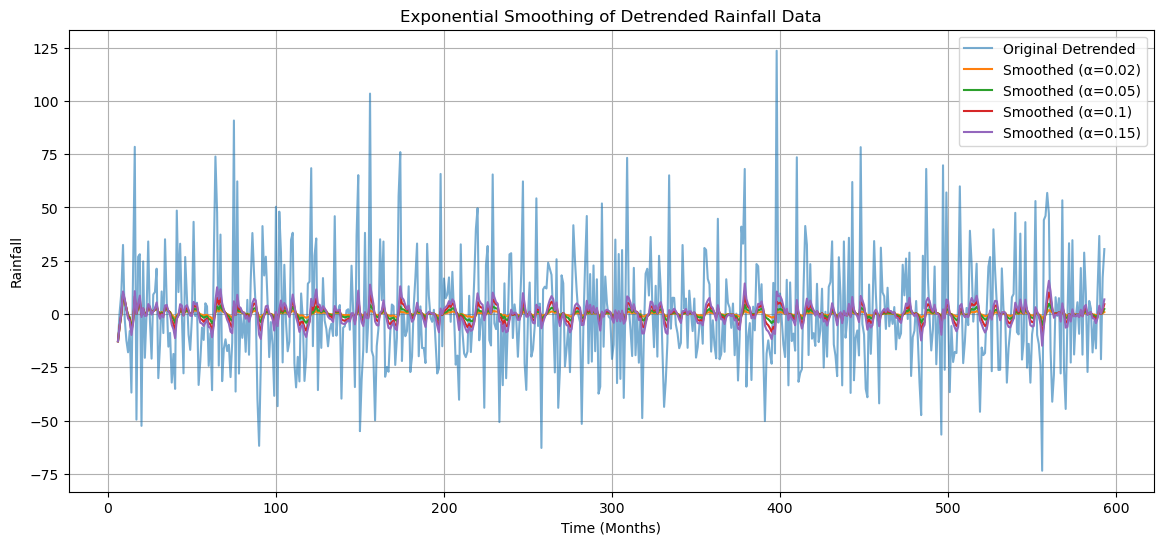

In [69]:
# Removing NaN values from detrended data
detrended_data_clean = detrended_data.dropna()

# Define alpha values to try
alpha_values = [0.02, 0.05, 0.1, 0.15]

# Plotting original detrended data
plt.figure(figsize=(14, 6))
plt.plot(detrended_data_clean, label='Original Detrended', linewidth=1.5, alpha=0.6)

# Applying Exponential Smoothing for different alpha values
for alpha in alpha_values:
    smoothed = detrended_data_clean.ewm(alpha=alpha).mean()
    plt.plot(smoothed, label=f'Smoothed (α={alpha})')

# Configuring the plot
plt.title('Exponential Smoothing of Detrended Rainfall Data')
plt.xlabel('Time (Months)')
plt.ylabel('Rainfall')
plt.legend()
plt.grid(True)
plt.show()


We can observe the difference Alpha

The effect of α value on smoothing. The details are as follows:

Smooth data: other lines represent different α.The result of smoothing under the value of α. As you can see, the smaller α values, such as 0.02, provide smoother lines, while larger α

The α value (for example, 0.15) adapts to changes in the data more quickly.

### Find the overall and partial trends of smooth data

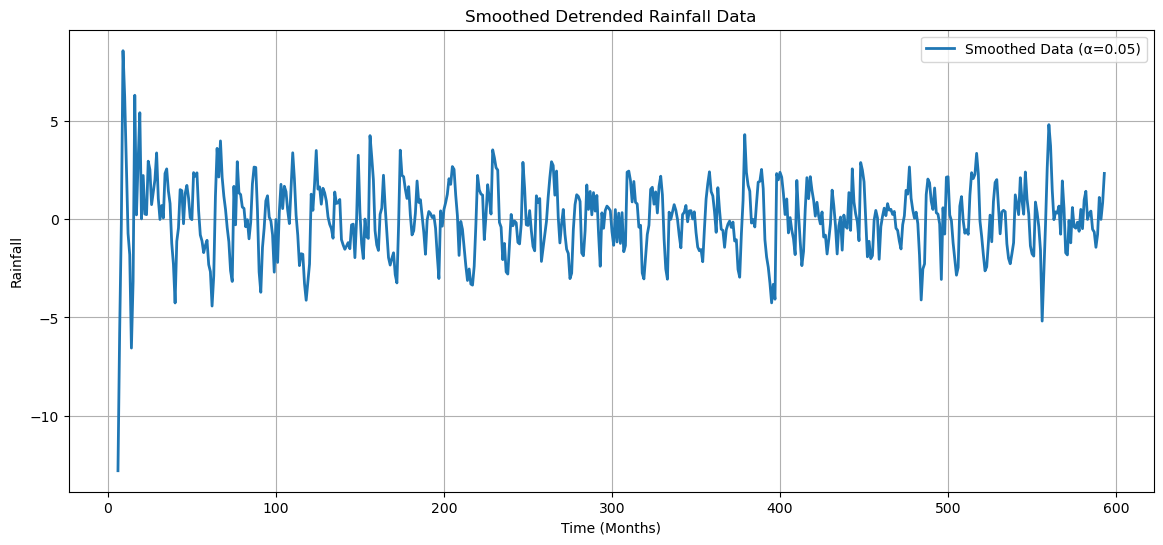

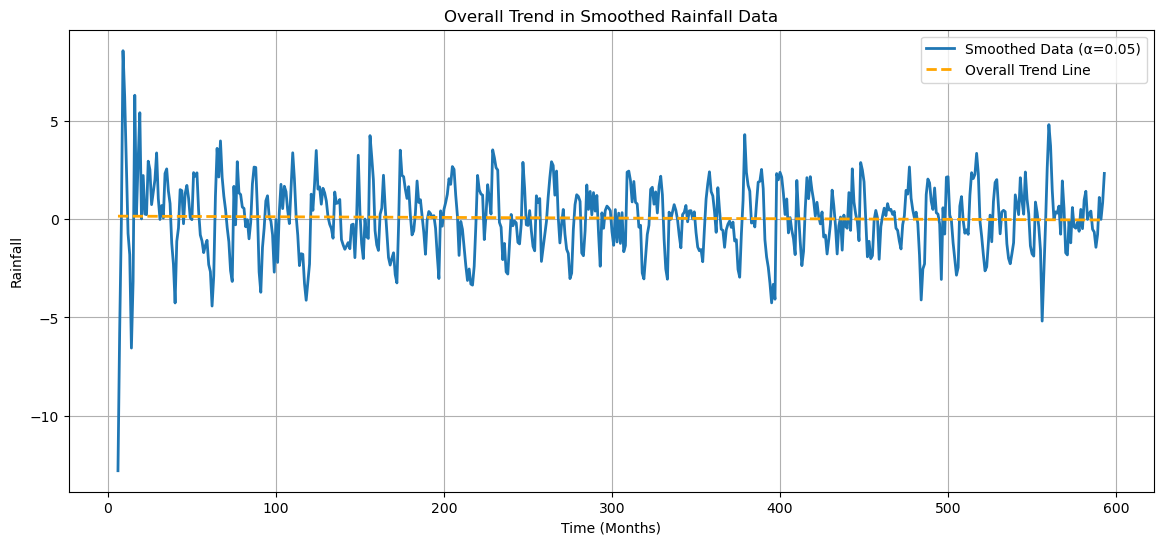

(-0.00033060675079904864, -0.030713176374138982, 0.45727251223717513)

In [70]:
# Applying Exponential Smoothing with alpha=0.05
alpha_selected = 0.05
smoothed_data = detrended_data_clean.ewm(alpha=alpha_selected).mean()

# Plotting smoothed data
plt.figure(figsize=(14, 6))
plt.plot(smoothed_data, label=f'Smoothed Data (α={alpha_selected})', linewidth=2)
plt.title('Smoothed Detrended Rainfall Data')
plt.xlabel('Time (Months)')
plt.ylabel('Rainfall')
plt.legend()
plt.grid(True)
plt.show()

# Getting the overall trend by linear regression
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(range(len(smoothed_data)), smoothed_data)

# Generating trend line
trend_line = [slope * x + intercept for x in range(len(smoothed_data))]

# Plotting the smoothed data and overall trend line
plt.figure(figsize=(14, 6))
plt.plot(smoothed_data, label=f'Smoothed Data (α={alpha_selected})', linewidth=2)
plt.plot(smoothed_data.index, trend_line, label='Overall Trend Line', linestyle='--', linewidth=2, color='orange')
plt.title('Overall Trend in Smoothed Rainfall Data')
plt.xlabel('Time (Months)')
plt.ylabel('Rainfall')
plt.legend()
plt.grid(True)
plt.show()

# Returning slope of the overall trend
slope, r_value, p_value


**Slope:** -0.00033

**R-squared value:** 0.0307

**P-value:** 0.457

Here, the slope is a negative value, indicating that the rainfall data after smoothing as a whole has a slight downward trend. However, the R-squared value is very small, indicating that the linear model is not very suitable for the data. The p-value is greater than 0.05, indicating that the slope is not significant.

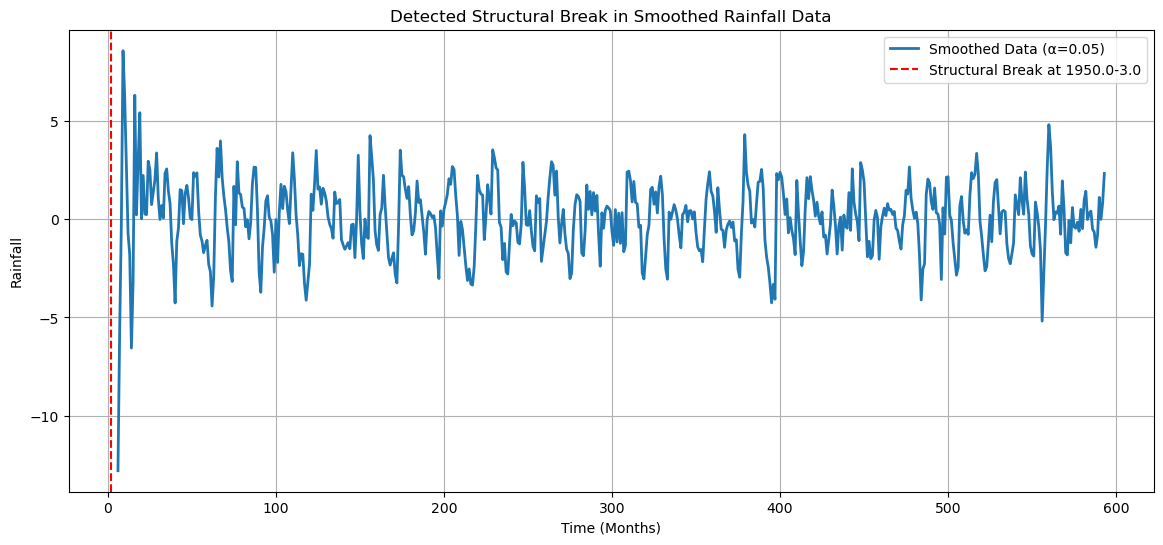

(2,
 Year     1950.0
 Month       3.0
 Name: 2, dtype: float64)

In [71]:
import numpy as np

# Chow Test to detect structural break
def chow_test(data):
    """
    Chow test to detect structural breaks in the data.
    Returns the index where the structural break is detected.
    """
    rss_full = np.sum((data - np.mean(data))**2)
    min_rss_split = rss_full  # initialize with the rss of full data
    break_point = None
    
    # Test all possible split points
    for i in range(1, len(data)-1):
        rss1 = np.sum((data[:i] - np.mean(data[:i]))**2)
        rss2 = np.sum((data[i:] - np.mean(data[i:]))**2)
        if rss1 + rss2 < min_rss_split:
            min_rss_split = rss1 + rss2
            break_point = i
            
    return break_point

# Detecting structural break in the smoothed data
break_point = chow_test(smoothed_data)
break_year_month = rainfall_data.loc[break_point, ['Year', 'Month']]

# Plotting the smoothed data and detected structural break
plt.figure(figsize=(14, 6))
plt.plot(smoothed_data, label=f'Smoothed Data (α={alpha_selected})', linewidth=2)
plt.axvline(break_point, color='red', linestyle='--', label=f'Structural Break at {break_year_month["Year"]}-{break_year_month["Month"]}')
plt.title('Detected Structural Break in Smoothed Rainfall Data')
plt.xlabel('Time (Months)')
plt.ylabel('Rainfall')
plt.legend()
plt.grid(True)
plt.show()

# Returning break point and corresponding year-month
break_point, break_year_month


Through the analysis of Chow Test, we detect a possible structural change point in the smoothed data. This point is in March 1950 (the second observation point). You can see this at the red dotted line in the figure.

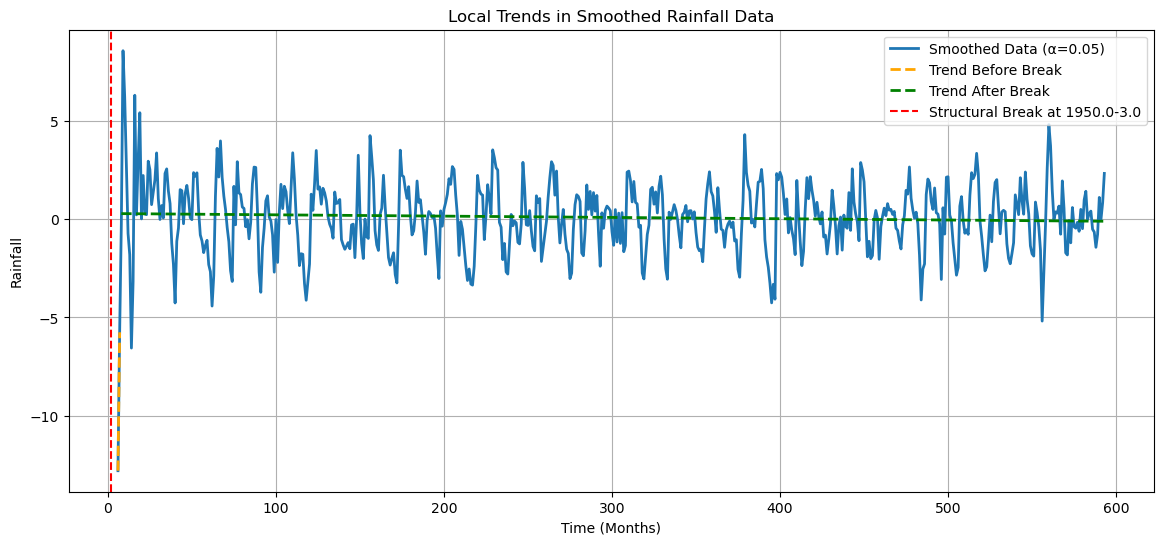

(7.031353567067859, -0.0006609825661888151)

In [72]:
# Splitting the data into two parts: before and after the break point
data_part1 = smoothed_data[:break_point]
data_part2 = smoothed_data[break_point:]

# Linear regression for the two parts
slope1, intercept1, _, _, _ = linregress(range(len(data_part1)), data_part1)
slope2, intercept2, _, _, _ = linregress(range(len(data_part2)), data_part2)

# Generating trend lines
trend_line1 = [slope1 * x + intercept1 for x in range(len(data_part1))]
trend_line2 = [slope2 * x + intercept2 for x in range(len(data_part2))]

# Plotting the smoothed data and local trend lines
plt.figure(figsize=(14, 6))
plt.plot(smoothed_data, label=f'Smoothed Data (α={alpha_selected})', linewidth=2)
plt.plot(data_part1.index, trend_line1, label='Trend Before Break', linestyle='--', linewidth=2, color='orange')
plt.plot(data_part2.index, trend_line2, label='Trend After Break', linestyle='--', linewidth=2, color='green')
plt.axvline(break_point, color='red', linestyle='--', label=f'Structural Break at {break_year_month["Year"]}-{break_year_month["Month"]}')
plt.title('Local Trends in Smoothed Rainfall Data')
plt.xlabel('Time (Months)')
plt.ylabel('Rainfall')
plt.legend()
plt.grid(True)
plt.show()

# Returning slopes of the local trends
(slope1, slope2)


We analyzed the trends in two different regions:

Before March 1950: the slope of the trend line was about 7.03.This means that the data shows an upward trend before the structural change point.

After March 1950: the slope of the trend line is about− 0.00066 . This means that after the structural change point, the data shows a slight downward trend.

In the figure, the orange dotted line represents the trend of the first interval, while the green dotted line represents the trend of the second interval. These two trends show that the structural change point does represent a significant change in the data.

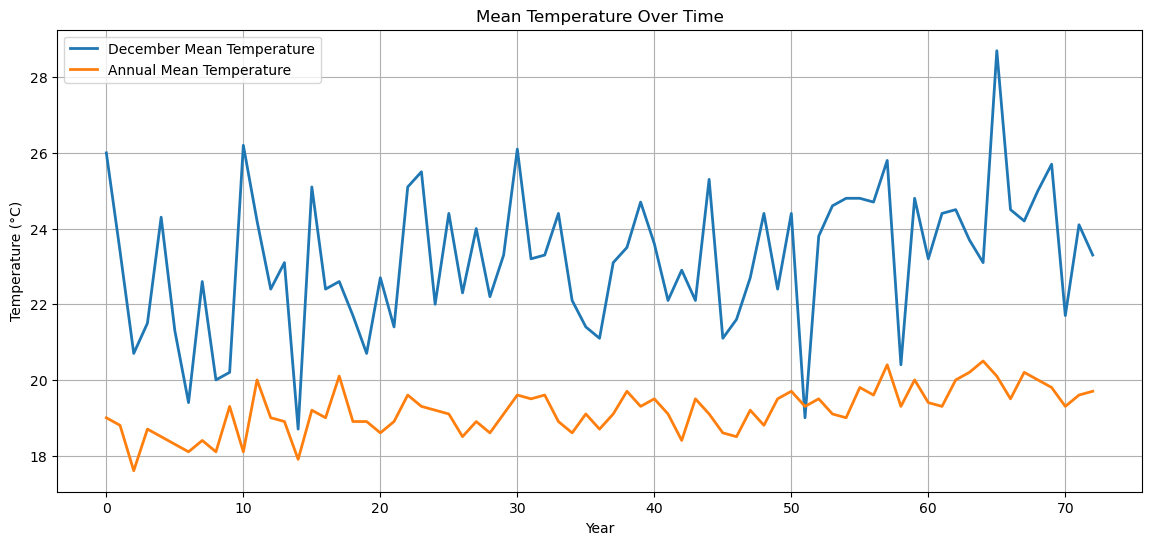

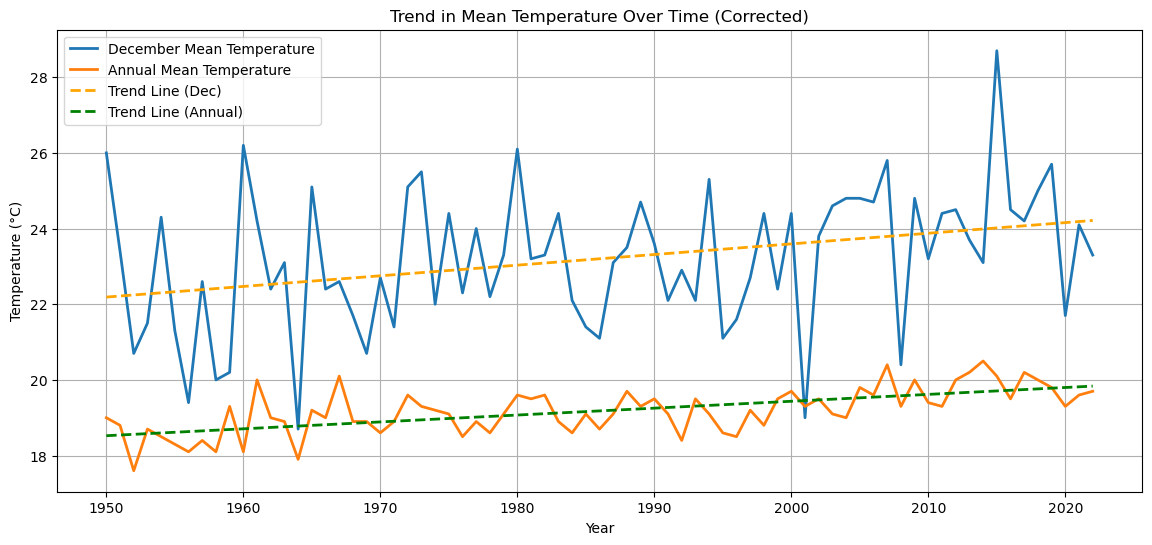

(0.028116129828458607, 0.01820004936443293)

In [74]:
# Extracting December and Annual mean temperature data
dec_temp = temperature_data['Dec']
annual_temp = temperature_data['Annual']

# Plotting December and Annual mean temperature data
plt.figure(figsize=(14, 6))
plt.plot(dec_temp, label='December Mean Temperature', linewidth=2)
plt.plot(annual_temp, label='Annual Mean Temperature', linewidth=2)
plt.title('Mean Temperature Over Time')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

# Linear regression to find the trend
slope_dec, intercept_dec, _, _, _ = linregress(temperature_data['Year'], dec_temp)
slope_annual, intercept_annual, _, _, _ = linregress(temperature_data['Year'], annual_temp)

# Generating trend lines
trend_line_dec = [slope_dec * x + intercept_dec for x in temperature_data['Year']]
trend_line_annual = [slope_annual * x + intercept_annual for x in temperature_data['Year']]

# Plotting the original data and corrected trend lines
plt.figure(figsize=(14, 6))
plt.plot(temperature_data['Year'], dec_temp, label='December Mean Temperature', linewidth=2)
plt.plot(temperature_data['Year'], annual_temp, label='Annual Mean Temperature', linewidth=2)
plt.plot(temperature_data['Year'], trend_line_dec, label='Trend Line (Dec)', linestyle='--', linewidth=2, color='orange')
plt.plot(temperature_data['Year'], trend_line_annual, label='Trend Line (Annual)', linestyle='--', linewidth=2, color='green')
plt.title('Trend in Mean Temperature Over Time (Corrected)')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()


# Returning slopes of the trend lines (representing change in temperature per year)
(slope_dec, slope_annual)



The trend line slope of the mean temperature in December is about 0.028, which means that the average temperature rises in December each year 0.028°C.

The trend line slope of the annual average temperature is about 0.018, which means that the annual average temperature increases by about A degrees.

## Reference
